# NANDINI GANTAYAT 

**Statistical & Machine Learning Individual project**  
**Prof.Minh Phan**   

IESEG School of Management  
MSc in Big Data Analytics for Business

# Project Objective  
(1) the understanding of machine learning mechanism   
(2) the ability to setup a machine learning pipeline.  

Bank Telemarketing Outcome Prediction  
Predict if the client will subscribe a term deposit after a bank telemarketing campaign

In [1]:
#!pip install boruta

# INITIATION - Library imports

In [96]:
# Data processing and exploration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns 
import plotly.graph_objects as go
import pickle

#Data preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, KBinsDiscretizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif, VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.manifold import TSNE

# Modeling and feature selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPClassifier
import random
import statsmodels.api as sm
from scipy import stats
from scipy.stats import kendalltau, pearsonr, spearmanr
from sklearn.model_selection import train_test_split
from boruta import BorutaPy

# Experimental setup
from sklearn.model_selection import KFold, StratifiedKFold, cross_validate, cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import learning_curve

#suppress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

**Reading the dataset**

In [3]:
df_bank=pd.read_csv("C:/Users/ngantayat1/Downloads/SML_INDIVIDUAL_PROJECT/Dataset_Bank Marketing_revised (1)/bank_mkt_train.csv",low_memory=False)

# Data cleaning and Preprocessing

**Exploratory data analysis and data summary**

In [4]:
df_bank.head(10)

,client_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
0,29925,42,management,married,basic.9y,no,no,no,cellular,jul,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
1,37529,35,unemployed,married,university.degree,no,yes,no,telephone,jun,...,4,999,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,0
2,2757,44,technician,married,basic.9y,no,yes,yes,cellular,may,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.264,5099.1,0
3,9642,45,services,married,high.school,no,yes,no,cellular,apr,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.453,5099.1,0
4,14183,45,unknown,married,unknown,unknown,unknown,unknown,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0
5,15180,38,technician,married,professional.course,no,no,no,telephone,may,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,0
6,27168,33,technician,married,professional.course,no,no,yes,cellular,apr,...,1,999,1,failure,-1.8,93.075,-47.1,1.405,5099.1,1
7,9097,38,blue-collar,single,basic.9y,unknown,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
8,30538,29,blue-collar,single,unknown,no,yes,no,cellular,may,...,1,999,1,failure,-1.8,92.893,-46.2,1.250,5099.1,0
9,28981,34,admin.,divorced,university.degree,no,yes,yes,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0


In [5]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       20000 non-null  int64  
 1   age             20000 non-null  int64  
 2   job             20000 non-null  object 
 3   marital         20000 non-null  object 
 4   education       20000 non-null  object 
 5   default         20000 non-null  object 
 6   housing         20000 non-null  object 
 7   loan            20000 non-null  object 
 8   contact         20000 non-null  object 
 9   month           20000 non-null  object 
 10  day_of_week     20000 non-null  object 
 11  campaign        20000 non-null  int64  
 12  pdays           20000 non-null  int64  
 13  previous        20000 non-null  int64  
 14  poutcome        20000 non-null  object 
 15  emp.var.rate    20000 non-null  float64
 16  cons.price.idx  20000 non-null  float64
 17  cons.conf.idx   20000 non-null 

In [6]:
df_bank.dtypes.value_counts()

object     10
int64       6
float64     5
dtype: int64

In [7]:
df_bank.shape

(20000, 21)

In [8]:
df_bank.isna().sum()  #no null values found

client_id         0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribe         0
dtype: int64

In [9]:
df_bank.describe()

,client_id,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
count,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,20683.031650,40.052000,2.58040,961.164400,0.171400,0.088100,93.577232,-40.472955,3.631806,5167.377640,0.113550
std,11898.274235,10.412877,2.79065,190.115383,0.493897,1.573281,0.579869,4.621674,1.731216,72.226178,0.317272
min,2.000000,17.000000,1.00000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,10311.750000,32.000000,1.00000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,20761.500000,38.000000,2.00000,999.000000,0.000000,1.100000,93.798000,-41.800000,4.857000,5191.000000,0.000000
75%,30993.250000,47.000000,3.00000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,41188.000000,98.000000,56.00000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [10]:
total_clients = df_bank['client_id'].count()
print(f'Total number of clients: {total_clients}')

Total number of clients: 20000


In [11]:
unique_clients = df_bank['client_id'].nunique()
print(f'The DataFrame train has {unique_clients} unique client IDs.')

The DataFrame train has 20000 unique client IDs.


**Creating a list of columns names for managing variables**

In [12]:
df_bank.columns.to_list()

['client_id',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'subscribe']

In [13]:
# List of numerical and catergorical variables present in the df_bank
num_vars = ['age', 'campaign', 'pdays', 'previous',
            'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan',
            'contact', 'month', 'day_of_week',
            'poutcome']

In [14]:
print('Data - # NA of num vars:', df_bank[num_vars].isna().sum().sum())
print('Data - # NA of cat vars:', df_bank[cat_vars].isna().sum().sum())

Data - # NA of num vars: 0
Data - # NA of cat vars: 0


In [15]:
id_var = ["client_id"]  # ID
target_var = ["subscribe"]  #Binary Target variable
predictors = [v for v in df_bank.columns if v not in id_var + target_var]

# checking the list of variables
assert(len(predictors) == len(num_vars) + len(cat_vars))

**Checking the target variable distribution to see if there is a class imbalance** 

In [16]:
print(df_bank[target_var].value_counts())   # number wise

print(df_bank[target_var].value_counts(normalize=True))  # percentage wise

subscribe
0            17729
1             2271
dtype: int64
subscribe
0            0.88645
1            0.11355
dtype: float64


**Check and correct data error - Outliers in numerical variables**

In [17]:
# Check the outliers on train, test
for v in num_vars:
    # Calculate the boundaries on train [mean-3*sd, mean+3*sd]
    mu = np.mean(df_bank[v])
    sd = np.std(df_bank[v])
    lower = mu - 3*sd
    upper = mu + 3*sd
    # Check outliers using the boundaries
    data_out = (df_bank[v] < lower) | (df_bank[v] > upper)
    if np.sum(data_out)  > 0:
        print(v, "has outliers :",
              np.sum(data_out), "[", np.round(100*np.mean(data_out), 2), "% ]")

age has outliers : 182 [ 0.91 % ]
campaign has outliers : 427 [ 2.14 % ]
pdays has outliers : 762 [ 3.81 % ]
previous has outliers : 522 [ 2.61 % ]


**Encode categorical variables**

In [18]:
# Encode categorical variables as integer values
# Categorical variables in any format will be converted to string

enc = OrdinalEncoder()
enc.fit(pd.concat([df_bank[cat_vars].astype(str), df_bank[cat_vars].astype(str)], axis=0))
df_bank[cat_vars] = enc.transform(df_bank[cat_vars].astype(str))

**Finalize the processed data**

In [19]:
# Print out the final variables
print("# id_var [", len(id_var), "] :", id_var)
print("# num_vars [", len(num_vars), "] :", num_vars)
print("# cat_vars [", len(cat_vars), "] :", cat_vars)
print("# target_var [", len(target_var), "] :", target_var)

# id_var [ 1 ] : ['client_id']
# num_vars [ 9 ] : ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
# cat_vars [ 10 ] : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
# target_var [ 1 ] : ['subscribe']


In [20]:
df_bank = df_bank[id_var + num_vars + cat_vars + target_var]

**Train Test Split**

In [21]:
#create train test split
train, test = train_test_split(df_bank, test_size=0.2, random_state=42, stratify=df_bank.subscribe)

In [22]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [23]:
print("Train Shape : ",train.shape)
print("Test Shape : ", test.shape)

Train Shape :  (16000, 21)
Test Shape :  (4000, 21)


# Feature Engineering  
   
   **VALUE TRANSFORMATION (num, cat => cat)**  
1) Add polynomial terms for numerical variables   
2) Remapping categorical variables - Decision tree–based remapping  
3) Binning and dicretization     

   **VALUE REPRESENTATION (cat => num)**  
1) Categorical variable: Dummy coding  
2) Categorical variable: Incidence replacement  
3) Categorical variable: Weight of Evidence (WoE) conversion  





**Mutual information**

In [24]:
# Check mutual information for all variables
# Note: The calculation involves a random process, therefore, the result may change if there is no
# variable with significant information.
mutual_info = mutual_info_classif(train[cat_vars], train[target_var].values.squeeze())
mutual_info = pd.Series(mutual_info, index=cat_vars)
print("Top 10 vars :"); print(mutual_info.sort_values(ascending=False)[:10])

Top 10 vars :
poutcome       0.031002
month          0.030643
contact        0.013793
job            0.009954
housing        0.008110
default        0.007535
education      0.005831
day_of_week    0.002753
marital        0.001200
loan           0.000000
dtype: float64


**adding the polynomial terms (degree=3) for a num variable as it increases the LR model performance.**

In [25]:
enable_num_poly = True 

if enable_num_poly:
    for v in num_vars:
        # Setup the LR model
        cv = KFold(n_splits=5, random_state=1, shuffle=True)
        model = LogisticRegression(max_iter=200)
        parameters = {}
        clf = GridSearchCV(model, parameters, scoring="roc_auc", n_jobs=-1, cv=cv, verbose=0)
        
        # Fit the LR model for 1 numerical variable
        clf.fit(train[[v]], train[target_var].squeeze())
        clf_num_score = clf.best_score_
        
        # Fit the LR model for 1 numerical variable + it polynomial degree = 3
        poly = PolynomialFeatures(degree=3, include_bias=False)
        poly.fit(train[[v]])
        clf.fit(poly.transform(train[[v]]), train[target_var].squeeze())
        clf_poly_score = clf.best_score_
        
        # Add the polynomial terms to train, test
        if (clf_poly_score > 0.5) & (clf_poly_score - clf_num_score > 0.05):
            print('Variable', v, 'AUC vs. AUC poly:', clf_num_score, '-->', clf_poly_score)
            poly_vars = [v_poly.replace('x0', v) for v_poly in poly.get_feature_names()[1:]]
            num_vars = num_vars + poly_vars
            train[poly_vars] = pd.DataFrame(poly.transform(train[[v]])[:, 1:], columns=poly_vars)
            test[poly_vars] = pd.DataFrame(poly.transform(test[[v]])[:, 1:], columns=poly_vars)

Variable age AUC vs. AUC poly: 0.49143225824849673 --> 0.6019409974388598
Variable cons.conf.idx AUC vs. AUC poly: 0.5368042530608538 --> 0.5887988392474264


**Value transformation (num, cat => cat)**  

Steps included in value transformation  

For categorical variables : remapping  
For continuous variables : discretization or binning  

1. Test the value transformation on one variable  
2. Check the AUC and new number of categories formed  
3. Apply the value transformation on all variables if the AUC > 0.5 and number of new categories > 1 

In [26]:
# List of variables to track the value transformation process
trans_vars = []

 **Remapping categorical variables - Decision tree–based remapping**

In [27]:
# Select a cat variable
v = "job"

# Find the best decision tree
cv = KFold(n_splits=5, random_state=1, shuffle=True)
model = DecisionTreeClassifier()
parameters = {'min_samples_leaf':(train.shape[0]*np.array([0.01, 0.025, 0.05, 0.1, 0.25, 0.5])).astype(int)}
clf = GridSearchCV(model, parameters, scoring="roc_auc", n_jobs=-1, cv=cv, verbose=0)
clf.fit(train[[v]], train[target_var])
print("Best AUC:", clf.best_score_)
print("Best params:", clf.best_params_)
print("Number of leaves:", clf.best_estimator_.get_n_leaves())

Best AUC: 0.60597557748228
Best params: {'min_samples_leaf': 160}
Number of leaves: 11


In [28]:
# Grouping the categories into new categories (leaves) using Decision Tree
# Here, we use the decision path, the last node is the new segment of an observation
remap_v = [np.nonzero(r)[0].max() for r in clf.best_estimator_.decision_path(train[[v]]).toarray()]

print("# original categories:", train[[v]].nunique().values[0])
print("# new remapped categories:", len(set(remap_v)), set(remap_v))

# original categories: 12
# new remapped categories: 11 {2, 4, 6, 7, 10, 11, 14, 15, 17, 19, 20}


In [29]:
enable_trans_cat_dt=True

if enable_trans_cat_dt:
    for v in cat_vars:
        # Find the best decision tree using CV
        cv = KFold(n_splits=5, random_state=1, shuffle=True)
        model = DecisionTreeClassifier()
        parameters = {'min_samples_leaf':(train.shape[0]*np.array([0.01, 0.025, 0.05, 0.1, 0.25, 0.5])).astype(int)}
        clf = GridSearchCV(model, parameters, scoring="roc_auc", n_jobs=-1, cv=cv, verbose=0)
        clf.fit(train[[v]], train[target_var])
        # Remap the variable on train, test
        if (clf.best_score_ > 0.5) & (clf.best_estimator_.get_n_leaves() > 1):
            print("Remapping variable", v,
                  "from", train[[v]].nunique().values[0],
                  "to", clf.best_estimator_.get_n_leaves(), "categories")
            remap_var = v + '_remap'
            trans_vars.append(remap_var)
            train[remap_var] = [np.nonzero(r)[0].max() for r in clf.best_estimator_.decision_path(train[[v]]).toarray()]
            test[remap_var] = [np.nonzero(r)[0].max() for r in clf.best_estimator_.decision_path(test[[v]]).toarray()]

Remapping variable job from 12 to 11 categories
Remapping variable marital from 4 to 3 categories
Remapping variable education from 8 to 6 categories
Remapping variable default from 3 to 2 categories
Remapping variable housing from 3 to 2 categories
Remapping variable contact from 2 to 2 categories
Remapping variable month from 10 to 9 categories
Remapping variable day_of_week from 5 to 2 categories
Remapping variable poutcome from 3 to 3 categories


**Remapping continuous variable - Discretization and Binning**

In [30]:
# Select a num variable
v = "age"

# Find the best decision tree
cv = KFold(n_splits=5, random_state=1, shuffle=True)
model = DecisionTreeClassifier()
parameters = {'min_samples_leaf':(train.shape[0]*np.array([0.01, 0.025, 0.05, 0.1, 0.25, 0.5])).astype(int)}
clf = GridSearchCV(model, parameters, scoring="roc_auc", n_jobs=-1, cv=cv, verbose=0)
clf.fit(train[[v]], train[target_var])
print("Best AUC:", clf.best_score_)
print("Best params:", clf.best_params_)
print("Number of leaves:", clf.best_estimator_.get_n_leaves())

Best AUC: 0.5974011307218652
Best params: {'min_samples_leaf': 400}
Number of leaves: 26


In [31]:
# Grouping the categories into new categories (leaves) using Decision Tree
# Here, we use the decision path, the last node is the new segment of an observation
remap_v = [np.nonzero(r)[0].max() for r in clf.best_estimator_.decision_path(train[[v]]).toarray()]

print("# original data range: ", [train[[v]].min().values[0], train[[v]].max().values[0]])
print("# new remapped categories:", len(set(remap_v)), set(remap_v))

# original data range:  [18, 95]
# new remapped categories: 26 {3, 5, 6, 9, 11, 13, 15, 16, 21, 23, 25, 26, 28, 29, 31, 33, 35, 37, 40, 41, 42, 45, 47, 48, 49, 50}


In [32]:
enable_trans_num_dt=True

if enable_trans_num_dt:
    for v in num_vars:
        # Find the best decision tree using CV
        cv = KFold(n_splits=5, random_state=1, shuffle=True)
        model = DecisionTreeClassifier()
        parameters = {'min_samples_leaf':(train.shape[0]*np.array([0.01, 0.025, 0.05, 0.1, 0.25, 0.5])).astype(int)}
        clf = GridSearchCV(model, parameters, scoring="roc_auc", n_jobs=-1, cv=cv, verbose=0)
        clf.fit(train[[v]], train[target_var])
        # Remap the variable on train, test
        if (clf.best_score_ > 0.5) & (clf.best_estimator_.get_n_leaves() > 1):
            print("Discretize variable", v,
                  "from", [train[[v]].min().values[0], train[[v]].max().values[0]],
                  "to", clf.best_estimator_.get_n_leaves(), "categories")
            remap_var = v + '_bin'
            trans_vars.append(remap_var)
            train[remap_var] = [np.nonzero(r)[0].max() for r in clf.best_estimator_.decision_path(train[[v]]).toarray()]
            test[remap_var] = [np.nonzero(r)[0].max() for r in clf.best_estimator_.decision_path(test[[v]]).toarray()]

Discretize variable age from [18, 95] to 26 categories
Discretize variable campaign from [1, 56] to 7 categories
Discretize variable pdays from [0, 999] to 3 categories
Discretize variable previous from [0, 6] to 3 categories
Discretize variable emp.var.rate from [-3.4, 1.4] to 8 categories
Discretize variable cons.price.idx from [92.201, 94.767] to 14 categories
Discretize variable cons.conf.idx from [-50.8, -26.9] to 15 categories
Discretize variable euribor3m from [0.634, 5.045] to 45 categories
Discretize variable nr.employed from [4963.6, 5228.1] to 9 categories
Discretize variable age^2 from [324.0, 9025.0] to 26 categories
Discretize variable age^3 from [5832.0, 857375.0] to 26 categories
Discretize variable cons.conf.idx^2 from [723.6099999999999, 2580.64] to 15 categories
Discretize variable cons.conf.idx^3 from [-131096.512, -19465.108999999997] to 15 categories


In [33]:
# Select a num variable
v = "age"

# Binning values of a variable into new groups using equal frequency approach
est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
est.fit(train[[v]])
print("Number of bins :", est.n_bins_[0])
est.bin_edges_

Number of bins : 10


array([array([18., 28., 31., 33., 36., 38., 41., 45., 49., 55., 95.])],
      dtype=object)

In [34]:
# Apply the binning to a variable
binef_v = est.transform(train[[v]])
pd.DataFrame(binef_v).value_counts().sort_index()

0.0    1246
1.0    1606
2.0    1444
3.0    2075
4.0    1303
5.0    1533
6.0    1745
7.0    1554
8.0    1855
9.0    1639
dtype: int64

In [35]:
enable_trans_num_ef=True

if enable_trans_num_ef:
    for v in num_vars:
        # Binning values of a variable
        est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
        est.fit(train[[v]])
        # Bin the variable on train, test
        if est.n_bins_[0] > 1:
            binef_var = v + '_binef'
            trans_vars.append(binef_var)
            train[binef_var] = est.transform(train[[v]])
            test[binef_var] = est.transform(test[[v]])

**Finalize value transformation**

In [36]:
# Finalize the variable list
cat_vars = cat_vars + trans_vars
print("Transformed num, cat variables into new categorical variables :", len(trans_vars))

Transformed num, cat variables into new categorical variables : 34


In [37]:
# Arrange the data columns
train = train[id_var + num_vars + cat_vars + target_var]
test = test[id_var + num_vars + cat_vars + target_var]
print(train.shape)
print(test.shape)

(16000, 59)
(4000, 59)


**Value representation (cat => num)**

**Categorical variable: Dummy coding**

In [38]:
# Select a cat variable
v = "job"

# Build the dummy encoding on [Var194]
enc = OneHotEncoder(drop="first", handle_unknown="error")
enc.fit(pd.concat([train[[v]], test[[v]]], axis=0))
enc.categories_

[array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])]

In [39]:
# Transform a categorical variable
dummy_v = enc.transform(train[[v]])
dummy_v.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [40]:
enable_repr_dummy=True

In [41]:
# List of variables to track the value representation process
repr_vars = []
dummy_vars = []

if enable_repr_dummy:
    # Create dummy variables, drop the first dummy column
    enc = OneHotEncoder(drop="first", handle_unknown="error")
    enc.fit(pd.concat([train[cat_vars], test[cat_vars]], axis=0))
    dummy_vars = enc.get_feature_names().tolist()
    repr_vars = repr_vars + dummy_vars
    # Transform train, test
    train_dummy = enc.transform(train[cat_vars])
    test_dummy = enc.transform(test[cat_vars])

In [42]:
if enable_repr_dummy:
    # Create dummy variables, drop the first dummy column
    enc = OneHotEncoder(drop="first", handle_unknown="error")
    enc.fit(pd.concat([train[cat_vars], test[cat_vars]], axis=0))
    dummy_vars = enc.get_feature_names().tolist()
    repr_vars = repr_vars + dummy_vars
    # Transform train, test
    train_dummy = enc.transform(train[cat_vars])
    test_dummy = enc.transform(test[cat_vars])

**Incidence replacement**

In [43]:
v = "job"

# Find the incidence rates per category of a categorical variable
tb = pd.pivot_table(train, values=target_var, index=v, aggfunc=np.mean).reset_index()
tb.columns = [v, v + "_icd"]
tb

,job,job_icd
0,0.0,0.126708
1,1.0,0.070113
2,2.0,0.094203
3,3.0,0.109557
4,4.0,0.124889
5,5.0,0.255539
6,6.0,0.096661
7,7.0,0.080392
8,8.0,0.309091
9,9.0,0.107995


In [44]:
# Add/join the incidence variable
pd.merge(train[[v]], tb, on=v).head()

,job,job_icd
0,0.0,0.126708
1,0.0,0.126708
2,0.0,0.126708
3,0.0,0.126708
4,0.0,0.126708


In [45]:
enable_repr_icd=True

if enable_repr_icd:
    for v in cat_vars:
        # Find the incidence rates per category of a categorical variable
        tb = pd.pivot_table(train, values=target_var, index=v, aggfunc=np.mean).reset_index()
        icd_var = v + "_icd"
        repr_vars.append(icd_var)
        tb.columns = [v, icd_var]
        # Add the incidence column to train, test
        train[icd_var] = pd.merge(train[[v]], tb, on=v)[icd_var]
        test[icd_var] = pd.merge(test[[v]], tb, on=v)[icd_var]

**Weight-of-evidence conversion**

In [46]:
# Select a variable
v = "job"

# Find the incidence rates per category of a categorical variable
# Add +1 before calculating the log to avoid +/-Inf
tb = train[[v] + target_var].value_counts().unstack(fill_value=0).reset_index()
e = 1e-10  # Small value
tb[v + "_woe"] = np.log((tb[1] + e) / (tb[0] + e))
tb

subscribe,job,0,1,job_woe
0,0.0,3515,510,-1.930384
1,1.0,3382,255,-2.584959
2,2.0,500,52,-2.263364
3,3.0,382,47,-2.095273
4,4.0,988,141,-1.946923
5,5.0,504,173,-1.069285
6,6.0,514,55,-2.234890
7,7.0,1407,123,-2.437031
8,8.0,228,102,-0.804373
9,9.0,2354,285,-2.111382


In [47]:
# Add/join the WoE variable
pd.merge(train[[v]], tb[[v, v + "_woe"]], on=v).head()

,job,job_woe
0,0.0,-1.930384
1,0.0,-1.930384
2,0.0,-1.930384
3,0.0,-1.930384
4,0.0,-1.930384


 **Apply value representation for all categorical variables**

In [48]:
enable_repr_woe=True

if enable_repr_woe:
    for v in cat_vars:
        # Find the WoE per category of a categorical variable
        tb = train[[v] + target_var].value_counts().unstack(fill_value=0).reset_index()
        woe_var = v + "_woe"
        repr_vars.append(woe_var)
        e = 1e-10  # Small value
        tb[woe_var] = np.log((tb[1] + e) / (tb[0] + e))
        # Add the incidence column to train, test
        train[woe_var] = pd.merge(train[[v]], tb[[v, woe_var]], on=v)[woe_var]
        test[woe_var] = pd.merge(test[[v]], tb[[v, woe_var]], on=v)[woe_var]

**Finalizing value representation**

In [49]:
drop_cat_vars=True

# Drop cat vars
if drop_cat_vars:
    train = train.drop(cat_vars, axis=1)
    test = test.drop(cat_vars, axis=1)
    cat_vars = []

In [50]:
print(train.subscribe.isna().sum())
print(test.subscribe.isna().sum())

0
0


**Adding dummy variables**

In [51]:
train_dummy.shape

(16000, 350)

In [52]:
enable_repr_dummy=True

if enable_repr_dummy:
    train = pd.concat([train, pd.DataFrame(train_dummy.toarray(), columns=dummy_vars)], axis=1)
    test = pd.concat([test, pd.DataFrame(test_dummy.toarray(), columns=dummy_vars)], axis=1)
    del train_dummy, test_dummy

In [53]:
len(repr_vars)

788

**Finalize variable list**

In [54]:
num_vars = num_vars+repr_vars

In [55]:
# Arrange the data columns
train = train[id_var + num_vars + cat_vars + target_var]
test = test[id_var + num_vars + cat_vars + target_var]
print(train.shape)
print(test.shape)

(16000, 803)
(4000, 803)


**Data Normalization**

In [56]:
enable_normalize=True

if enable_normalize:
    for v in num_vars:
        # Build the normalizer on train
        scaler = MinMaxScaler().fit(train[[v]])
        # Apply on train, test
        train[v] = scaler.transform(train[[v]])
        test[v] = scaler.transform(test[[v]])

**Filter out low variance variables (or constant)**

In [57]:
# List of all predictors
predictors = num_vars + cat_vars

# Detect constant vars
sel = VarianceThreshold(0)  # Var = 0 by default
sel.fit(train[predictors])
const_vars = [predictors[i] for i in np.where(sel.variances_ == 0)[0]]
predictors = [v for v in predictors if v not in const_vars]

# Drop from train, test
print('Drop # constant vars :', len(const_vars))
train = train.drop(const_vars, axis=1)
test = test.drop(const_vars, axis=1)

Drop # constant vars : 0


**Drop duplicate values**

In [58]:
# Count the duplicated vars
dup_vars = train[predictors].T.duplicated()
print('# duplicated variables :', dup_vars.sum())

# duplicated variables : 1222


In [59]:
# Drop the duplicated vars from train, test
predictors = [predictors[i] for i in range(0, len(predictors)) if not dup_vars[i]]
train = train[id_var + predictors + target_var]
test = test[id_var + predictors + target_var]

In [60]:
# Print out the data to check
print(train.shape)
print(test.shape)

(16000, 411)
(4000, 411)


**Creating the BaseTable**

In [61]:
base_table = pd.concat([train, test]).reset_index(drop=True)

In [62]:
base_table.isna().sum().sum()

0

In [63]:
base_table.to_csv("C:/Users/ngantayat1/Downloads/SML_INDIVIDUAL_PROJECT/Nandini_SML_individual_BASETABLE.csv")

# Variable  Selection
**Filter Methods** 
1) Correlation - Pearson, Spearman, Kendall   
2) Fisher's Score  

**Wrapper methods**   
1) Recursive feature elimination (RFE)   
2) Boruta

**Dimensionality Reduction**
1) (t-SNE)

In [64]:
# Create several lists to handle variables
id_var = ['client_id']
target_var = ['subscribe']
predictors = [v for v in train.columns if v not in id_var + target_var]

**CORRELATION**

In [65]:
p_x = ['client_id', 'age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job',
       'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'age_na', 'campaign_na', 'pdays_na',
       'previous_na', 'emp.var.rate_na', 'cons.price.idx_na',
       'cons.conf.idx_na', 'euribor3m_na', 'nr.employed_na']

p_y = 'subscribe'

In [66]:
#Get corelation based on Kendall, Pearson and Spearman's score
def kendall_pval(x,y):
    return kendalltau(x,y)[1]

def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

def spearmanr_pval(x,y):
    return spearmanr(x,y)[1]

In [67]:
corr_p = train.corr(method=pearsonr_pval)
corr_s = train.corr(method=spearmanr_pval)
corr_k = train.corr(method=kendall_pval) 

In [68]:
#Get top variables based on the cutoff of 70%
cutoff = .7
cp_cols = corr_p[corr_p["subscribe"]>cutoff].index
cs_cols = corr_s[corr_s["subscribe"]>cutoff].index
ck_cols = corr_k[corr_k["subscribe"]>cutoff].index

In [69]:
cor_cols = list(set(cp_cols) & set(cs_cols) & set(ck_cols))
cor_cols.remove('subscribe')
print(len(cor_cols))

p_f_cols = list(cor_cols)

6


In [70]:
cor_cols

['x2_3.0', 'x26_27', 'x5_2.0', 'x28_11', 'x0_3.0', 'x29_45']

**Fisher's Score**

In [71]:
def FisherScore(bt, target_var, predictors):
    """
    This function calculate the Fisher score of a variable.
    
    """
    
    # Get the unique values of dependent variable
    target_var_val = bt[target_var].unique()
    # Calculate FisherScore for each predictor
    predictor_FisherScore = []
    for v in predictors:
        fs = np.abs(np.mean(bt.loc[bt[target_var]==target_var_val[0], v]) - np.mean(bt.loc[bt[target_var]==target_var_val[1], v])) / \
             np.sqrt(np.var(bt.loc[bt[target_var]==target_var_val[0], v]) + np.var(bt.loc[bt[target_var]==target_var_val[1], v]))
        predictor_FisherScore.append(fs)
    return predictor_FisherScore

In [72]:
# Calculate Fisher Score for all variable
fs = FisherScore(train, target_var[0], predictors)
fs_df = pd.DataFrame({"predictor":predictors, "fisherscore":fs})
fs_df["fisherscore2"] = fs_df.fisherscore.astype(str).str.extract(r' (.*)')
fs_df["fisher_merged"] = np.where(fs_df.fisherscore2.isna(),fs_df.fisherscore, fs_df.fisherscore2)
fs_df = fs_df.drop(["fisherscore2", "fisherscore"], axis=1)
fs_df.columns = ["predictor", "fisherscore"]
fs_df.fisherscore = fs_df.fisherscore.astype(float)
fs_df.head(10)

,predictor,fisherscore
0,age,0.067271
1,campaign,0.172507
2,pdays,0.473384
3,previous,0.394429
4,emp.var.rate,0.675799
5,cons.price.idx,0.273894
6,cons.conf.idx,0.103181
7,euribor3m,0.713607
8,nr.employed,0.753054
9,age^2,0.117966


In [73]:
fs_df = fs_df.sort_values('fisherscore', ascending=False).reset_index(drop=True)
fs_df.head()

,predictor,fisherscore
0,nr.employed,0.753054
1,euribor3m,0.713607
2,emp.var.rate,0.675799
3,pdays,0.473384
4,x9_2.0,0.455917


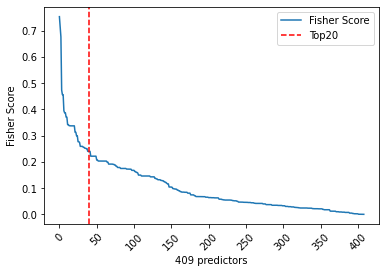

In [74]:
# Visualize the Fisher Score
plt.plot(fs_df['fisherscore'].values.squeeze())
plt.axvline(x=40, linestyle='dashed', color='red')
plt.xticks(rotation=45)
plt.xlabel(str(fs_df.shape[0]) + ' predictors')
plt.ylabel('Fisher Score')
plt.legend(['Fisher Score', 'Top20'])
plt.show()

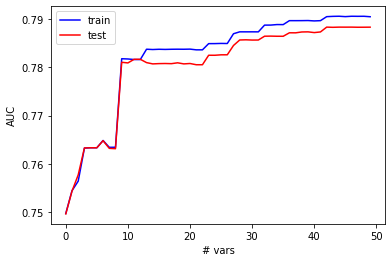

In [75]:
# Check how AUC change when add more variables: Top n vars
fs_scores = []
top_n_vars = 50
for i in range(1, top_n_vars+1):
    if i % 100 == 0: print('Added # top vars :', i)
    top_n_predictors = fs_df['predictor'][:i]
    clf = LogisticRegression()
    fs_scores.append(cross_validate(clf, train[top_n_predictors], train[target_var].values.squeeze(),
                                    scoring='roc_auc', cv=5, verbose=0, n_jobs=-1, return_train_score=True))

# How the AUC curve looks like when adding top vars
plt.plot([s['train_score'].mean() for s in fs_scores], color='blue')
plt.plot([s['test_score'].mean() for s in fs_scores], color='red')
plt.xlabel('# vars')
plt.ylabel('AUC')
plt.legend(['train', 'test'])
plt.show()

In [76]:
# Select the top variables based on Fisher Score
n_top_fs_vars = 35  # Top FS vars
top_fs_vars = fs_df['predictor'].values[:n_top_fs_vars]
print("Selected # vars :", len(top_fs_vars))
top_fs_vars

Selected # vars : 35


array(['nr.employed', 'euribor3m', 'emp.var.rate', 'pdays', 'x9_2.0',
       'x9_2.0', 'previous', 'x18_3', 'x18_3', 'x27_16', 'x27_16',
       'x15_2', 'x15_2', 'x27_13', 'x27_13', 'x23_13', 'x43_6.0',
       'x39_3.0', 'x43_6.0', 'x39_3.0', 'x23_13', 'x22_4', 'x22_4',
       'x42_3.0', 'x42_3.0', 'x37_5.0', 'x37_5.0', 'cons.price.idx',
       'x39_1.0', 'x27_9', 'x39_1.0', 'x27_9', 'x13_2', 'x13_2', 'x29_50'],
      dtype=object)

**RFE**

In [77]:
def feature_selection_rfe(X, y, estimators):
    selected_features = {}
    for estimator in estimators:
        rfe = RFE(estimator, n_features_to_select=10)
        rfe.fit(X, y)
        selected_features[str(estimator)] = list(X.columns[rfe.support_])
    return selected_features

In [116]:
estimators =[LogisticRegression()]     #, RandomForestClassifier(), LinearSVC(), GradientBoostingClassifier(), MLPClassifier()]

selected_features = feature_selection_rfe(train[predictors], train[target_var], estimators)

#for estimator_name, feature_names in selected_features.items():
    #print(estimator_name + ':', feature_names)
    
selected_features_list = []
for feature_names in selected_features.values():
    selected_features_list.extend(feature_names)

selected_features_list

['campaign',
 'pdays',
 'x26_38',
 'x27_13',
 'x27_13',
 'x27_16',
 'x27_16',
 'x31_12',
 'x37_1.0',
 'x30_24']

**BORUTA**

In [117]:
#let's initialize a RF model 
model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)

# let's initialize Boruta
feat_selector = BorutaPy(
            verbose=2,
            estimator=model,
            n_estimators='auto',
            max_iter=10  # number of iterations to perform
)

# train Boruta
feat_selector.fit(np.array(train[predictors]), np.array(train[target_var].values.ravel()))
boruta_features=feat_selector.transform(np.array(train[predictors])) 
# get selected features
# print support and ranking for each feature
print("\n------Support and Ranking for each feature------")
for i in range(len(feat_selector.support_)):
    if feat_selector.support_[i]:
        print("Passes the test: ", train[predictors].columns[i],
              " - Ranking: ", feat_selector.ranking_[i])
    else:
        print("Doesn't pass the test: ",
              train[predictors].columns[i], " - Ranking: ", feat_selector.ranking_[i])

boruta_features = list(train[predictors].columns[feat_selector.support_])
boruta_features


Iteration: 	1 / 10
Confirmed: 	0
Tentative: 	1197
Rejected: 	0
Iteration: 	2 / 10
Confirmed: 	0
Tentative: 	1197
Rejected: 	0
Iteration: 	3 / 10
Confirmed: 	0
Tentative: 	1197
Rejected: 	0
Iteration: 	4 / 10
Confirmed: 	0
Tentative: 	1197
Rejected: 	0
Iteration: 	5 / 10
Confirmed: 	0
Tentative: 	1197
Rejected: 	0
Iteration: 	6 / 10
Confirmed: 	0
Tentative: 	1197
Rejected: 	0
Iteration: 	7 / 10
Confirmed: 	0
Tentative: 	1197
Rejected: 	0
Iteration: 	8 / 10
Confirmed: 	113
Tentative: 	113
Rejected: 	971
Iteration: 	9 / 10
Confirmed: 	113
Tentative: 	113
Rejected: 	971


BorutaPy finished running.

Iteration: 	10 / 10
Confirmed: 	113
Tentative: 	49
Rejected: 	971

------Support and Ranking for each feature------
Passes the test:  age  - Ranking:  1
Doesn't pass the test:  campaign  - Ranking:  72
Passes the test:  pdays  - Ranking:  1
Passes the test:  previous  - Ranking:  1
Passes the test:  emp.var.rate  - Ranking:  1
Passes the test:  cons.price.idx  - Ranking:  1
Passes the test:  co

Doesn't pass the test:  x8_2.0  - Ranking:  395
Doesn't pass the test:  x8_4.0  - Ranking:  161
Doesn't pass the test:  x8_4.0  - Ranking:  158
Doesn't pass the test:  x8_4.0  - Ranking:  142
Doesn't pass the test:  x8_4.0  - Ranking:  123
Passes the test:  x9_2.0  - Ranking:  1
Passes the test:  x9_2.0  - Ranking:  1
Passes the test:  x9_2.0  - Ranking:  1
Passes the test:  x9_2.0  - Ranking:  1
Doesn't pass the test:  x10_6  - Ranking:  708
Doesn't pass the test:  x10_6  - Ranking:  724
Doesn't pass the test:  x10_6  - Ranking:  793
Doesn't pass the test:  x10_6  - Ranking:  739
Doesn't pass the test:  x10_10  - Ranking:  334
Doesn't pass the test:  x10_10  - Ranking:  341
Doesn't pass the test:  x10_10  - Ranking:  361
Doesn't pass the test:  x10_10  - Ranking:  379
Doesn't pass the test:  x10_14  - Ranking:  616
Doesn't pass the test:  x10_14  - Ranking:  673
Doesn't pass the test:  x10_14  - Ranking:  675
Doesn't pass the test:  x10_14  - Ranking:  627
Doesn't pass the test:  x10_

Doesn't pass the test:  x26_66  - Ranking:  1002
Doesn't pass the test:  x26_69  - Ranking:  1011
Doesn't pass the test:  x26_69  - Ranking:  982
Doesn't pass the test:  x26_69  - Ranking:  985
Doesn't pass the test:  x26_69  - Ranking:  1002
Doesn't pass the test:  x26_73  - Ranking:  1027
Doesn't pass the test:  x26_73  - Ranking:  984
Doesn't pass the test:  x26_73  - Ranking:  977
Doesn't pass the test:  x26_73  - Ranking:  969
Doesn't pass the test:  x26_78  - Ranking:  987
Doesn't pass the test:  x26_78  - Ranking:  1002
Doesn't pass the test:  x26_78  - Ranking:  1002
Doesn't pass the test:  x26_78  - Ranking:  980
Doesn't pass the test:  x26_81  - Ranking:  1027
Doesn't pass the test:  x26_81  - Ranking:  1002
Doesn't pass the test:  x26_81  - Ranking:  1027
Doesn't pass the test:  x26_81  - Ranking:  1015
Doesn't pass the test:  x26_86  - Ranking:  974
Doesn't pass the test:  x26_86  - Ranking:  962
Doesn't pass the test:  x26_86  - Ranking:  924
Doesn't pass the test:  x26_86

Doesn't pass the test:  x29_29  - Ranking:  799
Doesn't pass the test:  x29_33  - Ranking:  773
Doesn't pass the test:  x29_33  - Ranking:  808
Doesn't pass the test:  x29_33  - Ranking:  866
Doesn't pass the test:  x29_33  - Ranking:  873
Doesn't pass the test:  x29_37  - Ranking:  854
Doesn't pass the test:  x29_37  - Ranking:  830
Doesn't pass the test:  x29_37  - Ranking:  786
Doesn't pass the test:  x29_37  - Ranking:  900
Doesn't pass the test:  x29_37  - Ranking:  800
Doesn't pass the test:  x29_37  - Ranking:  837
Doesn't pass the test:  x29_37  - Ranking:  756
Doesn't pass the test:  x29_37  - Ranking:  772
Doesn't pass the test:  x29_41  - Ranking:  740
Doesn't pass the test:  x29_41  - Ranking:  615
Doesn't pass the test:  x29_41  - Ranking:  552
Doesn't pass the test:  x29_41  - Ranking:  590
Doesn't pass the test:  x29_41  - Ranking:  663
Doesn't pass the test:  x29_41  - Ranking:  605
Doesn't pass the test:  x29_41  - Ranking:  499
Doesn't pass the test:  x29_41  - Rankin

Doesn't pass the test:  x38_2.0  - Ranking:  96
Doesn't pass the test:  x38_4.0  - Ranking:  831
Doesn't pass the test:  x38_4.0  - Ranking:  874
Doesn't pass the test:  x38_4.0  - Ranking:  983
Doesn't pass the test:  x38_4.0  - Ranking:  965
Doesn't pass the test:  x38_6.0  - Ranking:  955
Doesn't pass the test:  x38_6.0  - Ranking:  928
Doesn't pass the test:  x38_6.0  - Ranking:  897
Doesn't pass the test:  x38_6.0  - Ranking:  925
Doesn't pass the test:  x38_8.0  - Ranking:  946
Doesn't pass the test:  x38_8.0  - Ranking:  774
Doesn't pass the test:  x38_8.0  - Ranking:  494
Doesn't pass the test:  x38_8.0  - Ranking:  861
Passes the test:  x39_1.0  - Ranking:  1
Passes the test:  x39_1.0  - Ranking:  1
Passes the test:  x39_1.0  - Ranking:  1
Passes the test:  x39_1.0  - Ranking:  1
Doesn't pass the test:  x39_3.0  - Ranking:  48
Doesn't pass the test:  x39_3.0  - Ranking:  67
Doesn't pass the test:  x39_3.0  - Ranking:  62
Doesn't pass the test:  x39_3.0  - Ranking:  60
Doesn't 

Doesn't pass the test:  x2_5.0  - Ranking:  309
Doesn't pass the test:  x2_5.0  - Ranking:  339
Doesn't pass the test:  x2_5.0  - Ranking:  385
Doesn't pass the test:  x2_5.0  - Ranking:  316
Doesn't pass the test:  x2_5.0  - Ranking:  270
Doesn't pass the test:  x2_5.0  - Ranking:  319
Doesn't pass the test:  x2_7.0  - Ranking:  515
Doesn't pass the test:  x2_7.0  - Ranking:  476
Doesn't pass the test:  x2_7.0  - Ranking:  544
Doesn't pass the test:  x2_7.0  - Ranking:  347
Doesn't pass the test:  x2_7.0  - Ranking:  568
Doesn't pass the test:  x2_7.0  - Ranking:  400
Doesn't pass the test:  x2_7.0  - Ranking:  523
Doesn't pass the test:  x2_7.0  - Ranking:  409
Doesn't pass the test:  x3_2.0  - Ranking:  1027
Doesn't pass the test:  x3_2.0  - Ranking:  1027
Doesn't pass the test:  x3_2.0  - Ranking:  1027
Doesn't pass the test:  x3_2.0  - Ranking:  1027
Doesn't pass the test:  x3_2.0  - Ranking:  1027
Doesn't pass the test:  x3_2.0  - Ranking:  1027
Doesn't pass the test:  x3_2.0  - 

Doesn't pass the test:  x29_23  - Ranking:  387
Doesn't pass the test:  x29_23  - Ranking:  452
Doesn't pass the test:  x29_23  - Ranking:  393
Doesn't pass the test:  x29_23  - Ranking:  532
Doesn't pass the test:  x29_23  - Ranking:  415
Doesn't pass the test:  x29_23  - Ranking:  408
Doesn't pass the test:  x29_23  - Ranking:  495
Doesn't pass the test:  x29_29  - Ranking:  797
Doesn't pass the test:  x29_29  - Ranking:  854
Doesn't pass the test:  x29_29  - Ranking:  885
Doesn't pass the test:  x29_29  - Ranking:  838
Doesn't pass the test:  x29_29  - Ranking:  888
Doesn't pass the test:  x29_29  - Ranking:  787
Doesn't pass the test:  x29_29  - Ranking:  802
Doesn't pass the test:  x29_29  - Ranking:  835
Doesn't pass the test:  x29_37  - Ranking:  944
Doesn't pass the test:  x29_37  - Ranking:  819
Doesn't pass the test:  x29_37  - Ranking:  878
Doesn't pass the test:  x29_37  - Ranking:  844
Doesn't pass the test:  x29_37  - Ranking:  862
Doesn't pass the test:  x29_37  - Rankin

['age',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'age^2',
 'age^3',
 'cons.conf.idx^2',
 'cons.conf.idx^3',
 'x7_5.0',
 'x7_5.0',
 'x7_5.0',
 'x7_5.0',
 'x7_5.0',
 'x7_5.0',
 'x7_5.0',
 'x7_5.0',
 'x7_9.0',
 'x9_2.0',
 'x9_2.0',
 'x9_2.0',
 'x9_2.0',
 'x15_2',
 'x15_2',
 'x15_2',
 'x15_2',
 'x16_10',
 'x16_10',
 'x16_10',
 'x16_10',
 'x18_3',
 'x18_3',
 'x18_3',
 'x18_3',
 'x22_4',
 'x22_4',
 'x22_4',
 'x22_4',
 'x27_7',
 'x27_7',
 'x27_7',
 'x27_7',
 'x27_9',
 'x27_9',
 'x27_9',
 'x27_9',
 'x27_16',
 'x27_16',
 'x27_16',
 'x27_16',
 'x29_50',
 'x29_50',
 'x29_50',
 'x29_50',
 'x30_6',
 'x30_6',
 'x30_6',
 'x30_6',
 'x31_18',
 'x31_18',
 'x31_18',
 'x31_18',
 'x31_18',
 'x31_18',
 'x31_18',
 'x31_18',
 'x31_25',
 'x31_25',
 'x31_25',
 'x31_25',
 'x31_25',
 'x37_5.0',
 'x37_5.0',
 'x37_5.0',
 'x37_5.0',
 'x39_1.0',
 'x39_1.0',
 'x39_1.0',
 'x39_1.0',
 'x42_3.0',
 'x42_3.0',
 'x42_3.0',
 'x42_3.0',
 'x7_5.0',
 'x7_5.0',
 

**T-SNE**

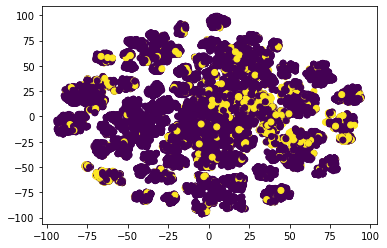

In [80]:
# Define the t-SNE model
tsne = TSNE(n_components=2, random_state=42)

# Fit the model to the data
X_tsne = tsne.fit_transform(train[predictors])

# Convert the target variable to a numerical array
colors = train[target_var].astype(int).values.flatten()

# Set the colormap
cmap = cm.get_cmap('viridis')

# Visualize the results
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=colors, cmap=cmap)
plt.show()


# MODELS  
1. Logistic regression
2. Random forest
3. SVM
4. GBM
5. Neural network


**Benchmarking models with all predictors and no parameter tuning**

In [97]:
logistic     = LogisticRegression()
randomForest = RandomForestClassifier()
KNN          = KNeighborsClassifier()
GBM          = GradientBoostingClassifier()
NeuralNet    = MLPClassifier()



# create a dict to loop through the models later on
models = {
          "Logistic Regression"     :logistic,
          "Random Forest"           :randomForest,
          "KNN "                    :KNN,
          "GBM"                     :GBM,
          "NN"                      :NeuralNet

         }

In [98]:
train_x_all = train[predictors]
train_y     = train[target_var].values.ravel()

test_x_all = test[predictors]
test_y     = test[target_var].values.ravel()



In [100]:
results = []

for model_name, model in models.items():
    model.fit(train_x_all, train_y)
    
    train_y_pred = model.predict(train_x_all)
    train_accuracy = accuracy_score(train_y, train_y_pred)
    train_auc = roc_auc_score(train_y, model.predict_proba(train_x_all)[:, 1])
    
    test_y_pred = model.predict(test_x_all)
    test_accuracy = accuracy_score(test_y, test_y_pred)
    test_auc = roc_auc_score(test_y, model.predict_proba(test_x_all)[:, 1])
    
    results.append({'Model': model_name, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 
                    'Train AUC': train_auc, 'Test AUC': test_auc})
    
results_df = pd.DataFrame(results)
results_df



,Model,Train Accuracy,Test Accuracy,Train AUC,Test AUC
0,Logistic Regression,0.903813,0.89825,0.805307,0.783552
1,Random Forest,0.997000,0.88625,0.999945,0.755153
2,KNN,0.909438,0.88225,0.922352,0.693164
3,GBM,0.908875,0.89750,0.817677,0.792058
4,NN,0.993500,0.85325,0.999580,0.701623


**Benchmarking models based on feature selection**

features from correlation

In [110]:
train_x_all = train[cor_cols]
train_y = train[target_var].values.ravel()

test_x_all = test[cor_cols]
test_y = test[target_var].values.ravel()

results = []

for model_name, model in models.items():
    model.fit(train_x_all, train_y)

    train_y_pred = model.predict(train_x_all)
    train_accuracy = accuracy_score(train_y, train_y_pred)
    train_auc = roc_auc_score(train_y, model.predict_proba(train_x_all)[:, 1])

    test_y_pred = model.predict(test_x_all)
    test_accuracy = accuracy_score(test_y, test_y_pred)
    test_auc = roc_auc_score(test_y, model.predict_proba(test_x_all)[:, 1])

    results.append({'Model_w_corr_feat': model_name, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy,
                    'Train AUC': train_auc, 'Test AUC': test_auc})

results_df_corr = pd.DataFrame(results)
results_df_corr


,Model_w_corr_feat,Train Accuracy,Test Accuracy,Train AUC,Test AUC
0,Logistic Regression,0.886437,0.8865,0.497412,0.514197
1,Random Forest,0.886437,0.8865,0.514813,0.518948
2,KNN,0.886437,0.8865,0.503324,0.501858
3,GBM,0.886437,0.8865,0.514313,0.517212
4,NN,0.886437,0.8865,0.508704,0.508857


features from fishers score

In [111]:
train_x_all = train[top_fs_vars]
train_y = train[target_var].values.ravel()

test_x_all = test[top_fs_vars]
test_y = test[target_var].values.ravel()

results = []

for model_name, model in models.items():
    model.fit(train_x_all, train_y)

    train_y_pred = model.predict(train_x_all)
    train_accuracy = accuracy_score(train_y, train_y_pred)
    train_auc = roc_auc_score(train_y, model.predict_proba(train_x_all)[:, 1])

    test_y_pred = model.predict(test_x_all)
    test_accuracy = accuracy_score(test_y, test_y_pred)
    test_auc = roc_auc_score(test_y, model.predict_proba(test_x_all)[:, 1])

    results.append({'Model_w_fisher_feat': model_name, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy,
                    'Train AUC': train_auc, 'Test AUC': test_auc})

results_df_fisher = pd.DataFrame(results)
results_df_fisher


,Model_w_fisher_feat,Train Accuracy,Test Accuracy,Train AUC,Test AUC
0,Logistic Regression,0.900750,0.89625,0.788169,0.786198
1,Random Forest,0.926937,0.89250,0.858730,0.762459
2,KNN,0.908188,0.89400,0.787803,0.732836
3,GBM,0.906250,0.89725,0.806929,0.794824
4,NN,0.903687,0.89625,0.797966,0.785475


In [120]:
train_x_all = train[selected_features_list]
train_y = train[target_var].values.ravel()

test_x_all = test[selected_features_list]
test_y = test[target_var].values.ravel()

results = []

for model_name, model in models.items():
    model.fit(train_x_all, train_y)

    train_y_pred = model.predict(train_x_all)
    train_accuracy = accuracy_score(train_y, train_y_pred)
    train_auc = roc_auc_score(train_y, model.predict_proba(train_x_all)[:, 1])

    test_y_pred = model.predict(test_x_all)
    test_accuracy = accuracy_score(test_y, test_y_pred)
    test_auc = roc_auc_score(test_y, model.predict_proba(test_x_all)[:, 1])

    results.append({'Model_w_RFE_feat': model_name, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy,
                    'Train AUC': train_auc, 'Test AUC': test_auc})

results_df_RFE = pd.DataFrame(results)
results_df_RFE


,Model_w_RFE_feat,Train Accuracy,Test Accuracy,Train AUC,Test AUC
0,Logistic Regression,0.90075,0.89700,0.783480,0.777204
1,Random Forest,0.90250,0.89450,0.798415,0.774015
2,KNN,0.89850,0.89250,0.739649,0.725675
3,GBM,0.90125,0.89675,0.793415,0.774543
4,NN,0.90075,0.89700,0.783847,0.779269


In [121]:
train_x_all = train[boruta_features]
train_y = train[target_var].values.ravel()

test_x_all = test[boruta_features]
test_y = test[target_var].values.ravel()

results = []

for model_name, model in models.items():
    model.fit(train_x_all, train_y)

    train_y_pred = model.predict(train_x_all)
    train_accuracy = accuracy_score(train_y, train_y_pred)
    train_auc = roc_auc_score(train_y, model.predict_proba(train_x_all)[:, 1])

    test_y_pred = model.predict(test_x_all)
    test_accuracy = accuracy_score(test_y, test_y_pred)
    test_auc = roc_auc_score(test_y, model.predict_proba(test_x_all)[:, 1])

    results.append({'Model_w_BORUTA_feat': model_name, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy,
                    'Train AUC': train_auc, 'Test AUC': test_auc})

results_df_BORUTA = pd.DataFrame(results)
results_df_BORUTA

,Model_w_BORUTA_feat,Train Accuracy,Test Accuracy,Train AUC,Test AUC
0,Logistic Regression,0.901813,0.89550,0.789940,0.794350
1,Random Forest,0.951187,0.88275,0.953717,0.728244
2,KNN,0.912375,0.88475,0.873106,0.702208
3,GBM,0.907500,0.89450,0.805487,0.795339
4,NN,0.905500,0.89675,0.796973,0.787564


# CROSSVALIDATION 

In [132]:
def k_fold_cv(models, X_train, y_train, X_test, y_test, cv=5):
    results = []

    for model_name, model in models.items():
        # Calculate cross validation scores
        accuracy_scores_train = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
        auc_scores_train = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
        accuracy_scores_test = cross_val_score(model, X_test, y_test, cv=cv, scoring='accuracy')
        auc_scores_test = cross_val_score(model, X_test, y_test, cv=cv, scoring='roc_auc')

        # Append results to list
        for i in range(cv):
            results.append({'Model': model_name, 'Fold': i+1, 
                            'Train Accuracy': accuracy_scores_train[i], 'Train AUC': auc_scores_train[i],
                            'Test Accuracy': accuracy_scores_test[i], 'Test AUC': auc_scores_test[i]})

    # Return results as a DataFrame
    return pd.DataFrame(results)

In [134]:
train_x_all = train[top_fs_vars]
train_y = train[target_var].values.ravel()

test_x_all = test[top_fs_vars]
test_y = test[target_var].values.ravel()

results_df_fisher_cv = k_fold_cv(models, train_x_all, train_y, test_x_all, test_y, cv=5)

results_df_fisher_cv

#the results either indicate data leakage or cv on a small datasets peforms poorly


,Model,Fold,Train Accuracy,Train AUC,Test Accuracy,Test AUC
0,Logistic Regression,1,0.900000,0.808202,0.90250,0.813709
1,Logistic Regression,2,0.900000,0.782135,0.88250,0.745726
2,Logistic Regression,3,0.902813,0.775848,0.89000,0.762737
3,Logistic Regression,4,0.900625,0.797296,0.89500,0.768332
4,Logistic Regression,5,0.900312,0.768770,0.90000,0.825610
5,Random Forest,1,0.896563,0.753741,0.89750,0.787332
6,Random Forest,2,0.889687,0.742752,0.88125,0.709899
7,Random Forest,3,0.895625,0.750806,0.88500,0.716820
8,Random Forest,4,0.892188,0.762981,0.87500,0.686209
9,Random Forest,5,0.892813,0.740316,0.88000,0.724105


**REFERENCES**  
prof. MINH PHANS in class kaggle pipeline notebook

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html

Mutual information. Link: https://en.wikipedia.org/wiki/Mutual_information

https://towardsdatascience.com/feature-selection-with-boruta-in-python-676e3877e596

http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

https://www.kaggle.com/code/agsam23/pca-vs-t-sne#:~:text=PCA%20vs%20t%2DSNE%3A%20t,and%20preserves%20large%20pairwise%20distances.

Coussement, K., Lessmann, S., & Verstraeten, G. (2017). A comparative analysis of data preparation algorithms for customer churn prediction: A case study in the telecommunication industry. Decision Support Systems, 95, 27-36.

Verbeke, W., Dejaeger, K., Martens, D., Hur, J., & Baesens, B. (2012). New insights into churn prediction in the telecommunication sector: A profit driven data mining approach. European Journal of Operational Research, 218(1), 211-229.

Verbeke, W., Dejaeger, K., Martens, D., Hur, J., & Baesens, B. (2012). New insights into churn prediction in the telecommunication sector: A profit driven data mining approach. European Journal of Operational Research, 218(1), 211-229



# THANK YOU